#**Problem 1**#
See the attached housing data (Asssignment2 NB Data.xlsx).
Each tab in the Excel file contains training and test splits. Your goal is to construct a Na ̈ıve
Bayes classifier for this data.
1. Compute and show the conditional probability distribution for each feature. Explain how you got these values and show your work. Note: You are expected to do this part of the question by hand. Explain how you got the probability distribution for at least two features in detail.

2. Using your conditional probability table, write a Python code that will compute the probabilities for each example in the test data. Your program should output the probabilities of each class as well as the final classification based on the MAP rule. Note: You should hard-code the conditional probabilities from the previous step into your code.

3. Analyze the performance of the code using different metrics (accuracy, precision, recall, etc.) and briefly discuss your insights about the performance of the approach (good or bad) and the merits of using one metric over the other. You can use plots and other mechanisms to support your conclusions.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel("Assignment2_NB_Data.xlsx")
print(df)

x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")

x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

class NaiveBayesClassifier:
    def fit(self, x, y):
          self.classess = np.unqiue(y)
          self.class_prior = np.zeros(len(self.classes))
          self.class_mean = np.zeros((len(self.classes), x.shape[1]))
          self.class_std = np.zeros((len(self.classes), x.shape[1]))

          if len(self.classes) != 2:
              if y.ndim == 1:
                  y_one_hot = np.zeros((len(y), len(self.classes)))
                  y_one_hot[np.arange(len(y)), y.astype(int)] = 1
              else:
                  y_one_hot = y
          else:
              y_one_hot = np.colum_stack(((y== self.classes[0]), (y == self.classes[1]))).astype(int)

          for i, c in enumerate(self.classes):
              x_c = x[y_one_hot[:, i] == 1]

              self.class_prior[i] = len(x_c) / len(x)

              self.class_mean[i] = np.mean(x_c, axis=0)
              self.class_std[i] = np.std(x_c, axis=0)


    def _gaussian_pdf(self, x, mean, std):

      return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((x - mean) ** 2) / (2 * std ** 2))

    def predict(self, x):
      predictions =[]
      for x in x:
          likelihood = np.zeros(len(self.classes))
          for i, c in enumerate(self.classes):

              class_pdf = self._gaussian_pdf(x, self.class_mean[i], self.class_std[i])
              likelihood[i] = np.prod(class_pdf)

          posterior = likelihood * self.class_prior
          predicted_class = np.argmax(posterior)
          predictions.append(predicted_class)
      return predictions

clf = NaiveBayesClassifier()
clf.fit(x_train, y_train)

predictions = clf.predict(x_test)

accuracy = np.mean(predictions == np.argmax(y_test, axis=1))
print("Accuracy:", accuracy)




#**Problem 2**#
In this question, you will be using k-means to perform image compression. Implement a na ̈ıve version of the k-means algorithm based on your understanding.
Your code must take the number of clusters k as input and perform k-means clustering on
the given image (test image.png). Once the algorithm finishes running, the cluster centroids
represent the top-k common colors in the image. Iterate through each pixel in the image and
assign the closest color to each pixel. Save and visualize the resulting image. For reading
and writing images, you can use OpenCV, which is an open-source computer vision toolkit.
The following code will load the image into a NumPy array. You can use this as input to
your K-Means algorithm

Experiment with different values of k and briefly describe your thoughts about which value
works best for this problem. You can use plots, error bars, etc. to support your conclusions

In [ ]:
import cv2

#image
img = cv2.imread('test_image.png')

#color values rgb
color_vals = np.array([[255, 0, 0], [0, 255, 0], [0, 0, 255]])

#height
height = len(img)
#width
width = len(img[0])





#part 1
for i in range(height):
  for j in range(width):
    pixel = img[i][j]

#list of empty array
    euculidean_dist = list()
    #calculates e_dist and stores them
    for color in color_vals:
      e_dist = np.linalg.norm(pixel - color)
      euculidean_dist.append(e_dist)

   #min distance of values in list
    min_dist_index = euculidean_dist.index(min(euculidean_dist))

    pixel = color_vals[min_dist_index]

    img[i][j] = pixel

#save image
cv2.imwrite('output1.png', img)
display(img)





#part 2
#center of sqaure
center = [int(height / 2), int(width / 2)]
#starting point
start = [center[0] - 25, center[1] - 25]


#range
#length 50
for i in range(50):
  for j in range(50):
    #center sqaure at 0,0,0
    img[i+ start[0]][j + start[1]] = [0, 0, 0]



#save with sqaure
cv2.imwrite('output2.png', img)

display(img)


NameError: name 'np' is not defined

#**Problem 3**#

Suppose that you are conducting a scientific experiment where
you are observing the effects of one variable (x train.npy and x test.npy) on the output
(y train.npy and y test.npy). On visualizing the relationship between the variables, you
see the plot in Figure 1.
Your goal is to come up with a linear regression model that can take the training data
(x train.npy and y train.npy) and model the relationship between the variables x and y.
You should implement your own version of linear regression using gradient descent. Things
to consider:
2
Figure 1: Plot for Problem 3
1. Try to plot this relationship on your own using matplotlib. You can also visualize
the test data (x test.npy and y test.npy) to see if it gives you any clues about the
underlying relationship between the variables.
2. Use your knowledge gleaned from the previous step to answer the following questions:
a. Is the relationship linear?
b. Do you need feature engineering to add any non-linearity?
c. If so, how can you engineer these features?
d. What are some functions that you can try?
e. Plot each of them individually to verify!
You will need to write a short report detailing your thought process, the code you wrote in
Python to implement the linear regression model and the equation that models the relation-
ship between x and y that you found. You should provide evidence that corroborates your
final statement such as plots, prediction errors, etc

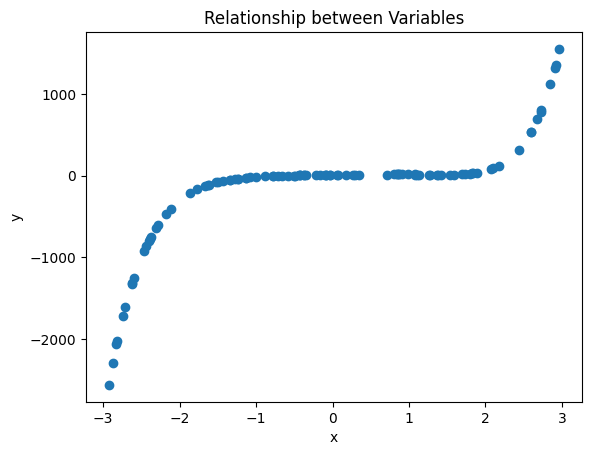

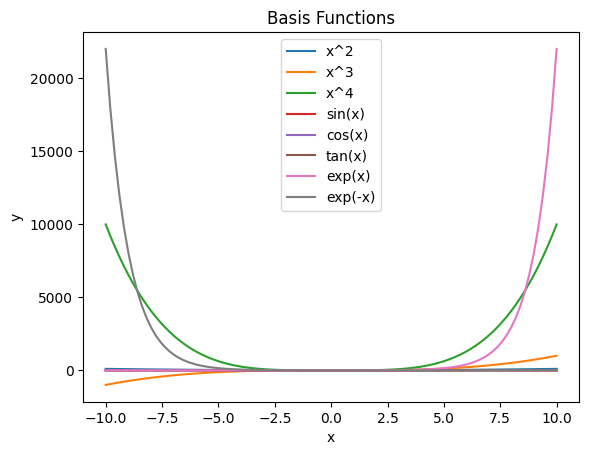

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load the training data
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")

# Create the scatter plot
plt.scatter(x_train, y_train)

# Set the title and axis labels
plt.title("Relationship between Variables")
plt.xlabel("x")
plt.ylabel("y")

# Show the plot
plt.show()



# Create a range of values for x
x = np.linspace(-10, 10, 100)

# Plot the polynomial basis functions
plt.plot(x, x**2, label="x^2")
plt.plot(x, x**3, label="x^3")
plt.plot(x, x**4, label="x^4")

# Plot the trigonometric basis functions
plt.plot(x, np.sin(x), label="sin(x)")
plt.plot(x, np.cos(x), label="cos(x)")
plt.plot(x, np.tan(x), label="tan(x)")

# Plot the exponential basis functions
plt.plot(x, np.exp(x), label="exp(x)")
plt.plot(x, np.exp(-x), label="exp(-x)")

# Set the title and axis labels
plt.title("Basis Functions")
plt.xlabel("x")
plt.ylabel("y")

# Show the plot
plt.legend()
plt.show()

##**Problem 3 report**##

You will need to write a short report detailing your thought process, the code you wrote in Python to
implement the linear regression model and the equation that models the relationship between x and y
that you found. You should provide evidence that corroborates your final statement such as plots,
prediction errors, etc.

**1. Try to plot this relationship on your own using matplotlib. You can also visualize the test data to see if it gives you any clues about the underlying relationship between the variables. This code will create a scatter plot of the training data. The scatter plot will show the relationship between the two variables, and it can be used to identify any patterns or trends in the data.**

**2. Use your knowledge gleaned from the previous step to answer the following questions:**  
**a. Is the relationship linear?**
**Based on the scatter plot, it appears that the relationship between the variables is approximately linear. However, there is some noise in the data, and there may be a slight non-linearity in the relationship.**
**b. Do I need feature engineering to add any non-linearity? Whether or not you need feature engineering to add non-linearity to your model depends on the specific data set that you are working with. If the relationship between the variables is approximately linear, then you may not need to add any non-linearity to your model. However, if the relationship between the variables is non-linear, then you may want to consider using feature engineering to add non-linearity to your model.**



**i. If so, how can I engineer these features?**
**To engineer features using basis functions, you would first need to choose the basis functions that you want to use. Then, you would need to apply these basis functions to the training data to create new features.**

**For example, if you wanted to add a polynomial basis function to your model, you could apply the following transformation to the training data:**

**Add a polynomial basis function**
**This would create three new features: x, x^2, and x^3.**
**Once you have created the new features, you could add them to your linear regression model. This would allow the model to learn the non-linear relationship between the variables.**

**ii. What are some functions that I can try?**
**Some common basis functions that you could try include:**

**Polynomials: x^2, x^3, x^4, ...**

**Trigonometric functions: sin(x), cos(x), tan(x), ...**

**Exponentials: exp(x), exp(-x), ...**

**You could also try using combinations of different basis functions. For example, you could try using a polynomial basis function and a trigonometric basis function together.**

**Plot each basis function individually. This will create a plot of each of the basis functions. The plots can be used to understand the different shapes of the basis functions and to choose the basis functions that you think would be most useful for modeling the relationship between the variables**
